<a href="https://colab.research.google.com/github/MartinezMolinaEnrique/TFG/blob/main/NSL_KDD_sin_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descargar el dataset NSL-KDD desde GitHub
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt


--2026-01-23 13:13:05--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.txt.4’

KDDTrain+.txt.4     100%[===================>]  18.22M  --.-KB/s    in 0.08s   

2026-01-23 13:13:05 (224 MB/s) - ‘KDDTrain+.txt.4’ saved [19109424/19109424]

--2026-01-23 13:13:05--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3441513 (3.3M) [text/plain]
Sa

In [ ]:
# Import de las librerías utilizadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
import pandas as pd

# Definir nombres de columnas según la especificación oficial del dataset
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

# Leer los archivos
train_df = pd.read_csv('KDDTrain+.txt', names=columns)
test_df = pd.read_csv('KDDTest+.txt', names=columns)



In [ ]:
pd.set_option('display.max_columns', None)
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:



# Crear columna binaria 'attack' (1 si es ataque, 0 si es normal)
train_df['attack'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Eliminar columna original 'label' si no la necesitas
train_df.drop(columns=['label'], inplace=True)
test_df.drop(columns=['label'], inplace=True)

train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [ ]:



train_df.head()
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,1


# 1) Chequeos rápidos (tipos, nulos, duplicados, distribución de clases)

In [ ]:
import numpy as np

# Tipos y nulos
print(train_df.dtypes.head(10))
print(train_df.isna().sum().sum(), "valores nulos en train")
print(test_df.isna().sum().sum(),  "valores nulos en test")

print("-----------------")

# Duplicados
print("Duplicados en train:", train_df.duplicated().sum())
print("Duplicados en test:",  test_df.duplicated().sum())

print("-----------------")

# Distribución de la variable objetivo
print("Distribución train (attack):")
print(train_df['attack'].value_counts(normalize=True).round(4))
print("\nDistribución test (attack):")
print(test_df['attack'].value_counts(normalize=True).round(4))


duration           int64
protocol_type     object
service           object
flag              object
src_bytes          int64
dst_bytes          int64
land               int64
wrong_fragment     int64
urgent             int64
hot                int64
dtype: object
0 valores nulos en train
0 valores nulos en test
-----------------
Duplicados en train: 9
Duplicados en test: 3
-----------------
Distribución train (attack):
attack
0    0.5346
1    0.4654
Name: proportion, dtype: float64

Distribución test (attack):
attack
1    0.5692
0    0.4308
Name: proportion, dtype: float64


Eliminamos los duplicados (aunque son casi despreciables)

In [ ]:
train_df = train_df.drop_duplicates().copy()
test_df  = test_df.drop_duplicates().copy()

# 2) Definir columnas numéricas y categóricas

En este paso clasificamos las variables del dataset según su tipo de dato y su rol, para preparar el terreno del preprocesamiento que haremos en el siguiente paso.

El objetivo es tratar adecuadamente cada tipo de variable antes de entrenar el modelo.
Esto es crucial porque los algoritmos de ML no pueden interpretar directamente texto o categorías simbólicas, y porque las variables numéricas necesitan estar en escalas comparables.

NSL-KDD mezcla tres tipos de datos.

**1. Variables categóricas (nominales)**
protocol_type → (tcp, udp, icmp)
service → tipo de servicio (http, smtp, ftp, etc.)
flag → estado de la conexión (SF, REJ, S0, etc.)
Estas las codificamos mediante **One-Hot Encoding**, es decir tendremos una columna para cada categoría.
Por ejemplo si tenemos las columnas rojo, azul y amarillo pasarían a ser Color_Rojo → 0 / 1, Color_Azul → 0 / 1, Color_Amarillo → 0 / 1.

**2. Variables numéricas (continuas o discretas)**
Estas se escalan (normalizan o estandarizan) para que todas estén en el mismo rango.

**3. Variable objetivo (attack)**
Es la que vamos a predecir ('Target variable'), no confundir con predictors.


In [ ]:
train_df.dtypes.value_counts()

,count
int64,25
float64,15
object,3


In [ ]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(exclude=['object']).columns

print("Variables categóricas:", list(categorical_cols))
print("Variables numéricas:", list(numerical_cols))


Variables categóricas: ['protocol_type', 'service', 'flag']
Variables numéricas: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'attack']


In [ ]:
train_df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


Podemos ver con estas dos celdas que en nuestro dataset disponemos de 3 columnas categóricas (tipo object) y las demás numéricas (int64 y float64). Pero esto no basta, porque algunas columnas “numéricas” en realidad son booleanas codificadas como 0/1 (por ejemplo, land, logged_in, is_guest_login, etc.), vamos a comprobarlo.

In [ ]:
for col in train_df.columns:
    unique_vals = train_df[col].nunique()
    dtype = train_df[col].dtype
    print(f"{col:25} → {str(dtype):10} | únicos: {unique_vals}")

duration                  → int64      | únicos: 2981
protocol_type             → object     | únicos: 3
service                   → object     | únicos: 70
flag                      → object     | únicos: 11
src_bytes                 → int64      | únicos: 3341
dst_bytes                 → int64      | únicos: 9326
land                      → int64      | únicos: 2
wrong_fragment            → int64      | únicos: 3
urgent                    → int64      | únicos: 4
hot                       → int64      | únicos: 28
num_failed_logins         → int64      | únicos: 6
logged_in                 → int64      | únicos: 2
num_compromised           → int64      | únicos: 88
root_shell                → int64      | únicos: 2
su_attempted              → int64      | únicos: 3
num_root                  → int64      | únicos: 82
num_file_creations        → int64      | únicos: 35
num_shells                → int64      | únicos: 3
num_access_files          → int64      | únicos: 10
num_outbound_cm

En la salida podemos ver algunas variables que sólo tienen 2 valores únicos. Estos nos quiere decir que son de tipo binarias o booleanas, por ejemplo: land, logged_in, root_shell.

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
numeric_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()

# Detectar binarias dentro de las numéricas
binary_cols = [col for col in numeric_cols if train_df[col].nunique() == 2]

print("Categóricas:", categorical_cols)
print("Binarias:", binary_cols)
print("Numéricas:", [c for c in numeric_cols if c not in binary_cols])


Categóricas: ['protocol_type', 'service', 'flag']
Binarias: ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login', 'attack']
Numéricas: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']


Con este bucle categorizamos los datos de manera más visual y simple.

# 3) Preprocesamiento inicial
🎯 Objetivo:

Dejar tus datos limpios y consistentes para que los algoritmos de ML no se vean afectados por:

valores infinitos o nulos, duplicados, columnas sin variabilidad (constantes).

Este paso es rápido, pero crítico: los modelos no pueden procesar NaN, inf o columnas sin información.

**1. Reemplazar los valores infinitos por NaN.**

Primero comprobamos el número de infinitos que contiene nuestro dataset.

In [ ]:
# Contar valores infinitos solo en columnas numéricas
inf_train = train_df.select_dtypes(include=np.number).apply(lambda x: np.isinf(x).sum()).sum()
inf_test = test_df.select_dtypes(include=np.number).apply(lambda x: np.isinf(x).sum()).sum()

print("Infinitos antes del reemplazo:")
print("Train:", inf_train)
print("Test:", inf_test)

Infinitos antes del reemplazo:
Train: 0
Test: 0


Reemplazamos por NaN.

In [ ]:
# Reemplazar valores infinitos (+inf, -inf) por NaN
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Comprobación rápida: Contar valores infinitos solo en columnas numéricas
print("Valores infinitos en train:", train_df.select_dtypes(include=np.number).apply(lambda x: np.isinf(x).sum()).sum())
print("Valores infinitos en test:", test_df.select_dtypes(include=np.number).apply(lambda x: np.isinf(x).sum()).sum())

Valores infinitos en train: 0
Valores infinitos en test: 0


 **2. Eliminar las filas que contengan NaN.**

In [ ]:
# Contar cuántos valores NaN hay antes de eliminar
print("Valores NaN en train antes:", train_df.isna().sum().sum())
print("Valores NaN en test antes:", test_df.isna().sum().sum())

Valores NaN en train antes: 0
Valores NaN en test antes: 0


In [ ]:
# Eliminar cualquier fila con NaN
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Verificar que se han eliminado
print("Valores NaN en train después:", train_df.isna().sum().sum())
print("Valores NaN en test después:", test_df.isna().sum().sum())

# Mostrar nuevo tamaño de los datasets
print("Tamaño train:", train_df.shape)
print("Tamaño test :", test_df.shape)

Valores NaN en train después: 0
Valores NaN en test después: 0
Tamaño train: (125964, 43)
Tamaño test : (22541, 43)


***El dataset NSL-KDD viene limpio de NaN y valores infinitos, por tanto es innecesaria.***

**3. Eliminar columnas sin información útil.**

Queremos identificar y eliminar las columnas constantes, es decir, aquellas que tienen un solo valor único en todas las filas.

In [ ]:
# Buscar columnas con un solo valor único
constant_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]

print("Columnas constantes encontradas:", constant_cols)

Columnas constantes encontradas: ['num_outbound_cmds']


In [ ]:
# Eliminar las columnas constantes
train_df.drop(columns=constant_cols, inplace=True)
test_df.drop(columns=constant_cols, inplace=True)

print("Tamaño del dataset después de eliminar columnas constantes:")
print("Train:", train_df.shape)
print("Test :", test_df.shape)

Tamaño del dataset después de eliminar columnas constantes:
Train: (125964, 42)
Test : (22541, 42)


¿Por qué es importante eliminar las columnas con valores constantes?
1. Porque el escalador (StandardScaler) o codificador (OneHotEncoder) espera variabilidad.
Si una columna es constante:

    El StandardScaler intentará dividir entre su desviación estándar, que será 0, generando divisiones por cero → NaN o inf.

    El OneHotEncoder no se rompe, pero genera columnas redundantes (una única columna con todo 1), sin utilidad.

2. Porque los algoritmos de ML no aprenden nada de variables sin varianza.
No aportan información discriminante:
si una columna tiene el mismo valor para todas las instancias, no ayuda a distinguir entre tráfico normal o malicioso.

3. Porque simplifica el pipeline y ahorra memoria.
Cada columna adicional, aunque inútil, incrementa el número de operaciones que realiza el encoder y el modelo.
Esto se nota especialmente en datasets grandes o al usar modelos como Random Forest o redes neuronales.

4. Porque evita problemas numéricos o warnings posteriores.
Algunos modelos (por ejemplo, LogisticRegression con regularización L2) pueden lanzar advertencias o converger más lentamente si tienen columnas con varianza cero.

# 4) Pipeline de preprocesamiento
Un pipeline de preprocesamiento es una “cadena” que aplica, de forma ordenada y siempre igual, las transformaciones necesarias a tus datos antes de que lleguen al modelo.

**1. Separar X/y y crear el split train/validation.**



In [ ]:
# Paso 1 — Separar X/y y crear split de validación estratificado

from sklearn.model_selection import train_test_split

# 1) Definimos columnas de entrada y la variable objetivo
target_col = 'attack'
feature_cols = [c for c in train_df.columns if c != target_col]

X = train_df[feature_cols]
y = train_df[target_col].astype(int)


**2. Haces un split interno train/val (tr/val)
 estratificado para afinar hiperparámetros sin tocar el test oficial.**

In [ ]:
# 2) Split interno para validación (sin tocar el test oficial)
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.20,         # 20% para validación
    stratify=y,             # estratificación por la clase
    random_state=42
)

# 3) Comprobaciones rápidas
print("Shapes:")
print("  X_tr:", X_tr.shape, " | y_tr:", y_tr.shape)
print("  X_val:", X_val.shape, "| y_val:", y_val.shape)

print("\nDistribución de clases (train split):")
print(y_tr.value_counts(normalize=True).round(4))

print("\nDistribución de clases (val split):")
print(y_val.value_counts(normalize=True).round(4))


Shapes:
  X_tr: (100771, 41)  | y_tr: (100771,)
  X_val: (25193, 41) | y_val: (25193,)

Distribución de clases (train split):
attack
0    0.5346
1    0.4654
Name: proportion, dtype: float64

Distribución de clases (val split):
attack
0    0.5346
1    0.4654
Name: proportion, dtype: float64


**3. ColumnTransformer con One-Hot + escalado**

Transformamos las variables categóricas en binarias y escalamos las numéricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 1 Columnas categóricas (nominales)
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

# 2️ Columnas numéricas (todas las demás, incluidas las binarias 0/1)
num_cols = [c for c in X_tr.columns if c not in cat_cols]

# 3️ Definimos el transformador
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)



In [ ]:
# 4️ Ajustamos SOLO con el split de entrenamiento (evitamos fuga de datos)
preprocess.fit(X_tr)

# 5️ Transformamos train y val para comprobar el resultado
Xt_tr  = preprocess.transform(X_tr)
Xt_val = preprocess.transform(X_val)

# 6️ Comprobaciones
print("Shape X_tr original      :", X_tr.shape)
print("Shape X_tr transformado  :", Xt_tr.shape)
print("Shape X_val original     :", X_val.shape)
print("Shape X_val transformado :", Xt_val.shape)

feat_names = preprocess.get_feature_names_out()
print("Nº de features finales:", len(feat_names))

Shape X_tr original      : (100771, 41)
Shape X_tr transformado  : (100771, 121)
Shape X_val original     : (25193, 41)
Shape X_val transformado : (25193, 121)
Nº de features finales: 121


In [ ]:
ohe = preprocess.named_transformers_['cat']
{col: len(cats) for col, cats in zip(cat_cols, ohe.categories_)}

{'protocol_type': 3, 'service': 69, 'flag': 11}

In [ ]:
# categorías en el dataset completo (train_df)
cats_full = {c: set(train_df[c].unique()) for c in cat_cols}

# categorías vistas en el fit (X_tr)
cats_fit = {c: set(cats) for c, cats in zip(cat_cols, ohe.categories_)}

# diferencias: categorías presentes en train_df pero ausentes en X_tr
missing = {c: sorted(list(cats_full[c] - cats_fit[c])) for c in cat_cols}
missing


{'protocol_type': [], 'service': ['http_2784'], 'flag': []}

In [ ]:
n_ohe = sum(len(cats) for cats in ohe.categories_)
n_num = len(num_cols)
n_ohe, n_num, n_ohe + n_num

(83, 38, 121)

Comprobación de los datos

1. Ver las columnas originales

In [ ]:
X_tr.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
93099,0,tcp,http,SF,148,14602,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,19,19,0.0,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,21
106668,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,1,1.0,1.00,0.0,0.0,0.01,0.06,0.0,255,16,0.06,0.07,0.00,0.00,1.0,1.00,0.0,0.0,19
37854,0,tcp,http,SF,223,1378,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15,15,0.0,0.00,0.0,0.0,1.00,0.00,0.0,15,222,1.00,0.00,0.07,0.03,0.0,0.00,0.0,0.0,21
113322,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,19,0.0,0.00,1.0,1.0,0.07,0.05,0.0,255,19,0.07,0.05,0.00,0.00,0.0,0.00,1.0,1.0,21
113160,0,tcp,smtp,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1.0,0.25,0.0,0.0,1.00,0.00,1.0,3,146,0.67,0.67,0.33,0.02,1.0,0.01,0.0,0.0,15


2. Ver las nuevas columnas generadas por el ColumnTransformer

Vemos que las columnas que contenían variables categóricas ahora son binarias.

In [ ]:
feat_names = preprocess.get_feature_names_out()
print("Número total de columnas:", len(feat_names))
print("Primeras 20 columnas:\n", feat_names[:20])


Número total de columnas: 121
Primeras 20 columnas:
 ['protocol_type_icmp' 'protocol_type_tcp' 'protocol_type_udp'
 'service_IRC' 'service_X11' 'service_Z39_50' 'service_aol' 'service_auth'
 'service_bgp' 'service_courier' 'service_csnet_ns' 'service_ctf'
 'service_daytime' 'service_discard' 'service_domain' 'service_domain_u'
 'service_echo' 'service_eco_i' 'service_ecr_i' 'service_efs']


3. Comparar valores antes y después (visualmente)

Los textos (tcp, udp, etc.) se convirtieron en 0/1.

Las variables numéricas ahora están escalados (valores cercanos a 0, algunos negativos, otros positivos).

In [ ]:
Xt_tr_sample = pd.DataFrame(
    preprocess.transform(X_tr.head(5)),  # transforma solo 5 filas
    columns=feat_names
)

print("Datos transformados (primeras 5 filas):")
Xt_tr_sample.head()


Datos transformados (primeras 5 filas):


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.11035,-0.008212,-0.002061,-0.014089,-0.089153,-0.008191,-0.094252,-0.02712,1.236686,-0.010815,-0.036216,-0.023484,-0.011413,-0.025502,-0.018582,-0.040284,-0.00315,-0.096618,-0.569375,-0.121520,-0.637182,-0.631896,-0.374167,-0.374147,0.770953,-0.349572,-0.375038,0.734893,1.258592,1.065317,-0.438978,-0.480896,-0.289923,-0.639646,-0.624847,-0.387285,-0.375984,0.652665
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.11035,-0.008235,-0.005309,-0.014089,-0.089153,-0.008191,-0.094252,-0.02712,-0.808613,-0.010815,-0.036216,-0.023484,-0.011413,-0.025502,-0.018582,-0.040284,-0.00315,-0.096618,0.907066,-0.368370,1.602677,1.605301,-0.374167,-0.374147,-1.481038,-0.016132,-0.375038,0.734893,-0.900667,-1.028369,-0.067217,-0.480896,-0.289923,1.608345,1.618987,-0.387285,-0.375984,-0.219936
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.11035,-0.008201,-0.005003,-0.014089,-0.089153,-0.008191,-0.094252,-0.02712,1.236686,-0.010815,-0.036216,-0.023484,-0.011413,-0.025502,-0.018582,-0.040284,-0.00315,-0.096618,-0.604320,-0.176376,-0.637182,-0.631896,-0.374167,-0.374147,0.770953,-0.349572,-0.375038,-1.684321,0.960452,1.065317,-0.438978,-0.254653,-0.022349,-0.639646,-0.624847,-0.387285,-0.375984,0.652665
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

4. Confirmar que las escalas son correctas

La media debería estar muy cerca de 0, y la desviación estándar muy cerca de 1 (porque el escalador centra y normaliza cada columna).

In [ ]:
# Extraer solo la parte numérica del transformador
num_transformer = preprocess.named_transformers_['num']
X_num_scaled = num_transformer.transform(X_tr[num_cols])

print("Media aproximada:", np.mean(X_num_scaled, axis=0)[:5])
print("Desviación std  :", np.std(X_num_scaled, axis=0)[:5])


Media aproximada: [-1.29739571e-17  4.40691479e-19 -8.63755298e-19 -3.52553183e-18
 -1.99192548e-17]
Desviación std  : [1. 1. 1. 1. 1.]


# 5) Modelo base (LogisticRegression + pesos balanceados) y métricas

In [ ]:
from sklearn.linear_model import LogisticRegression

# Definimos el modelo base
logreg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1,
    solver='lbfgs',
    random_state=42
)


In [ ]:
from sklearn.pipeline import Pipeline

# Unimos preprocesamiento y modelo
modeloBase = Pipeline(steps=[
    ('preprocesamiento', preprocess),
    ('clasificador', logreg)
])

# Entrenar con el split de train
modeloBase.fit(X_tr, y_tr)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, random_state=42))])

In [ ]:
modeloBase.named_steps['preprocesamiento']

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['protocol_type', 'service', 'flag']),
                                ('num', StandardScaler(),
                                 ['duration', 'src_bytes', 'dst_bytes', 'land',
                                  'wrong_fragment', 'urgent', 'hot',
                                  'num_failed_logins', 'logged_in',
                                  'num_compromised', 'root_shell',
                                  'su_attempted', 'num_root',
                                  'num_file_creations', 'num_shells',
                                  'num_access_files', 'is_host_login',
                                  'is_guest_login', 'count', 'srv_count',
                                  'serror_rate', 'srv_serror_rate',
                                  'rerror_rate', 'srv_rerror_rate',
                                  'same_srv_rate', 'diff_srv_rate',
                                  'srv_diff_host_rate', 'dst_host_count',
                                  'dst_host_srv_count',
                                  'dst_host_same_srv_rate', ...])],
                  verbose_feature_names_out=False)

In [ ]:
modeloBase.named_steps['clasificador']

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

### INICIO PRUEBAS PARÁMETROS
$z = w1 \cdot x1 + w2 \cdot x2 + ... + wn*xn + b$

In [ ]:
# Bias (b)
b = modeloBase.named_steps['clasificador'].intercept_

# Pesos (w)
w = modeloBase.named_steps['clasificador'].coef_
n_pesos = w.shape[1]

print("b (bias):",b)
print("w (pesos):",w)
print("Número de pesos:", n_pesos)

b (bias): [-2.63815152]
w (pesos): [[ 5.40317559e-01 -1.06527277e+00 -1.23309172e+00 -4.40750335e+00
  -2.31076367e+00  4.87104341e-01  1.88665672e-05 -2.40887890e+00
   5.52678710e-01  1.01548243e+00  3.49566259e-01  8.85024670e-01
   4.89337746e-01  4.05088573e-01 -3.50844691e+00 -2.44327006e+00
   6.89779838e-01  1.94410393e+00  3.27462629e+00  1.00911715e+00
   7.64520955e-01 -2.11575381e+00 -6.13548355e-01 -2.30904668e+00
   1.09786103e+00  1.23579865e-05  3.53239319e-01 -3.31455243e-01
   9.96002724e-01  1.18365592e-05  1.78454337e+00  5.52068238e-01
   9.40665151e-01  8.22580498e-01  9.65849937e-01  5.42186395e-01
   6.29182981e-01  4.96335894e-01  8.29482821e-01  3.90578170e-01
   3.07460949e-01  4.57329884e-01  1.01379205e+00  1.33600123e+00
   9.28042208e-01 -2.81977750e-01 -1.91352981e+00  8.56814635e-04
   1.99516852e-01 -1.51632197e+00  2.44379035e-01  3.42918826e+00
  -8.14712341e-03  7.28969377e-01  3.89217084e-01 -1.67245617e-01
  -3.24886093e+00  7.34319967e-01  7.1870

In [ ]:
# Transformación a escalar
b = b[0]
w = w[0]

# Cogemos x1, primera fila del conjunto entrenamiento X_tr
x1 = X_tr.iloc[[0]].reset_index(drop=True)
print("x1:",x1.shape)
print("x1:\n",x1.T)

# Aplicamos el preprocesamiento
x1_t = modeloBase.named_steps['preprocesamiento'].transform(x1)
print("x1 transformada:\n", x1_t)
print("x1 transformada:", x1_t.shape)

x1: (1, 41)
x1:
                                  0
duration                         0
protocol_type                  tcp
service                       http
flag                            SF
src_bytes                      148
dst_bytes                    14602
land                             0
wrong_fragment                   0
urgent                           0
hot                              0
num_failed_logins                0
logged_in                        1
num_compromised                  0
root_shell                       0
su_attempted                     0
num_root                         0
num_file_creations               0
num_shells                       0
num_access_files                 0
is_host_login                    0
is_guest_login                   0
count                           19
srv_count                       19
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
sam

In [ ]:
z1 = x1_t @ w + b
print("z(1):", z1[0])

z(1): -7.2138375955836285


In [ ]:
from scipy.special import expit #sigmoide (función activación)
p1 = expit(z1)
print("P(attack | x1):", p1[0])

P(attack | x1): 0.0007357842280457629


In [ ]:
modeloBase.predict_proba(x1)[:, 1]

array([0.00073578])

### FIN PRUEBA

In [ ]:
# Predecimos probabilidades
print(modeloBase.named_steps['clasificador'].classes_)
modeloBase.predict_proba(X_val)

[0 1]


array([[9.98980499e-01, 1.01950102e-03],
       [4.17651467e-06, 9.99995823e-01],
       [9.99691687e-01, 3.08313228e-04],
       ...,
       [7.77382825e-10, 9.99999999e-01],
       [4.48380444e-03, 9.95516196e-01],
       [9.98239744e-01, 1.76025555e-03]])

In [ ]:
# Predecimos categorias
modeloBase.predict(X_val)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_tr = modeloBase.predict(X_tr)
y_pred_val = modeloBase.predict(X_val)
print("Exactitud entrenamiento:", accuracy_score(y_tr, y_pred_tr))
print("Exactitud validación  :", accuracy_score(y_val, y_pred_val))

Exactitud entrenamiento: 0.9897688819203938
Exactitud validación  : 0.9899972214504029


# VALIDACIÓN del modelo con el split del conjunto de entrenamiento (X_val, y_val)



In [ ]:
# =========================
# MÉTRICAS EXTRA (VALIDACIÓN)
# Precision / Recall / F1 / F2 / BalancedAcc / PR-AUC
# =========================
from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score,
    balanced_accuracy_score, average_precision_score
)

# Predicciones en VALIDACIÓN
y_pred_val = modeloBase.predict(X_val)

# Probabilidades en VALIDACIÓN (necesarias para PR-AUC y umbral)
y_proba_val = modeloBase.predict_proba(X_val)[:, 1]

accuracy_val         = modeloBase.score(X_val, y_val)
precision_attack_val = precision_score(y_val, y_pred_val, pos_label=1)
recall_attack_val    = recall_score(y_val, y_pred_val, pos_label=1)
f1_attack_val        = f1_score(y_val, y_pred_val, pos_label=1)
f2_attack_val        = fbeta_score(y_val, y_pred_val, beta=2, pos_label=1)

bal_acc_val          = balanced_accuracy_score(y_val, y_pred_val)
pr_auc_val           = average_precision_score(y_val, y_proba_val)  # PR-AUC

print("===== MÉTRICAS (VALIDACIÓN | clase positiva = Attack = 1) =====")
print(f"Accuracy:                {accuracy_val:.4f}")
print(f"Precision (Attack):      {precision_attack_val:.4f}")
print(f"Recall (Attack):         {recall_attack_val:.4f}")
print(f"F1 (Attack):             {f1_attack_val:.4f}")
print(f"F2 (Attack):             {f2_attack_val:.4f}")
print(f"Balanced Accuracy:       {bal_acc_val:.4f}")
print(f"PR-AUC (AveragePrec):    {pr_auc_val:.4f}")


===== MÉTRICAS (VALIDACIÓN | clase positiva = Attack = 1) =====
Accuracy:                0.9900
Precision (Attack):      0.9847
Recall (Attack):         0.9939
F1 (Attack):             0.9893
F2 (Attack):             0.9921
Balanced Accuracy:       0.9903
PR-AUC (AveragePrec):    0.9974


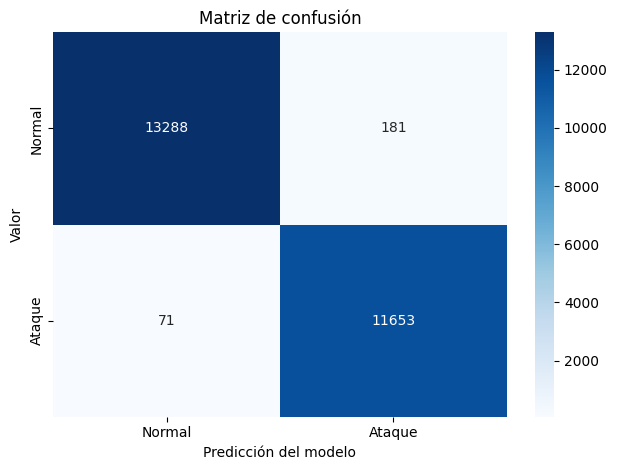

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Normal", "Ataque"]

cm = confusion_matrix(y_val, y_pred_val)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",           # enteros
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicción del modelo")
plt.ylabel("Valor")
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()


# Validación del modelo con el conjunto de test oficial (KDDTest+.txt)

### MÉTRICAS PROFESOR (MEJOR EXPLICADAS PASO A PASO)


In [ ]:
# =========================
# MÉTRICAS EXTRA: Precision/Recall/F1/F2/BalancedAcc/PR-AUC
# =========================
from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score,
    balanced_accuracy_score, average_precision_score
)

# Variables de test
X_test = test_df.drop(columns=['attack'])
y_test = test_df['attack'].astype(int)

# Por si no lo tienes creado en la celda anterior
y_pred_test = modeloBase.predict(X_test)

# Necesario para PR-AUC (y para umbral si quieres)
y_proba_test = modeloBase.predict_proba(X_test)[:, 1]

accuracy         = modeloBase.score(X_test, y_test)
precision_attack = precision_score(y_test, y_pred_test, pos_label=1)
recall_attack    = recall_score(y_test, y_pred_test, pos_label=1)
f1_attack        = f1_score(y_test, y_pred_test, pos_label=1)
f2_attack        = fbeta_score(y_test, y_pred_test, beta=2, pos_label=1)

bal_acc          = balanced_accuracy_score(y_test, y_pred_test)
pr_auc           = average_precision_score(y_test, y_proba_test)  # PR-AUC

print("===== MÉTRICAS (clase positiva = Attack = 1) =====")
print(f"Accuracy:                {accuracy:.4f}")
print(f"Precision (Attack):      {precision_attack:.4f}")
print(f"Recall (Attack):         {recall_attack:.4f}")
print(f"F1 (Attack):             {f1_attack:.4f}")
print(f"F2 (Attack):             {f2_attack:.4f}")
print(f"Balanced Accuracy:       {bal_acc:.4f}")
print(f"PR-AUC (AveragePrec):    {pr_auc:.4f}")

===== MÉTRICAS (clase positiva = Attack = 1) =====
Accuracy:                0.8121
Precision (Attack):      0.9216
Recall (Attack):         0.7321
F1 (Attack):             0.8160
F2 (Attack):             0.7635
Balanced Accuracy:       0.8249
PR-AUC (AveragePrec):    0.8905


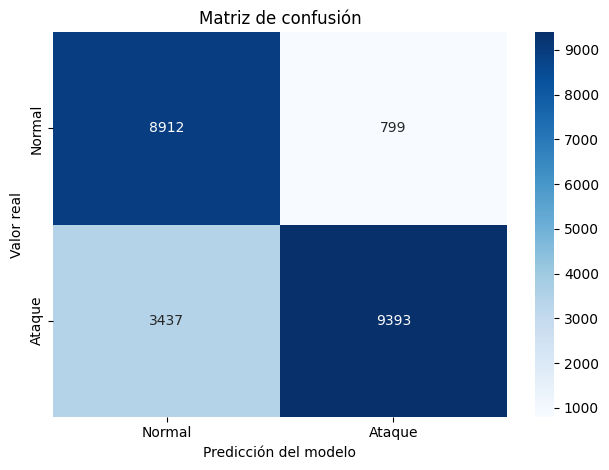

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Normal", "Ataque"]

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",           # enteros
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicción del modelo")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()


In [ ]:
# =========================
# MATRIZ DE CONFUSIÓN
# =========================
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])

cm_df = pd.DataFrame(
    cm,
    index=["Real: Normal (0)", "Real: Attack (1)"],
    columns=["Pred: Normal (0)", "Pred: Attack (1)"]
)

print("===== MATRIZ DE CONFUSIÓN =====")
display(cm_df)

===== MATRIZ DE CONFUSIÓN =====


,Pred: Normal (0),Pred: Attack (1)
Real: Normal (0),8912,799
Real: Attack (1),3437,9393


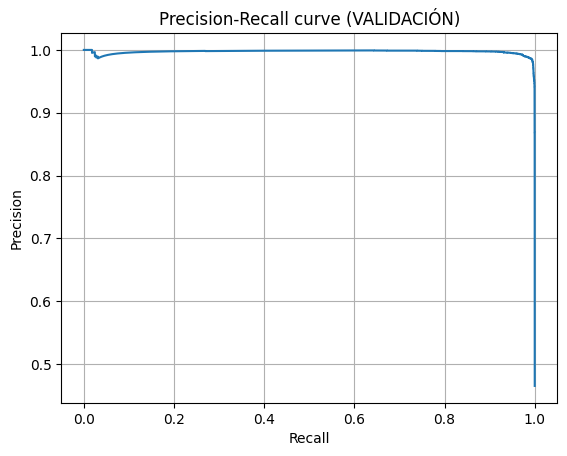

In [ ]:
# =========================
# CURVA PRECISION-RECALL VALIDACIÓN
# =========================
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresholds = precision_recall_curve(y_val, y_proba_val)

plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve (VALIDACIÓN)")
plt.grid(True)
plt.show()

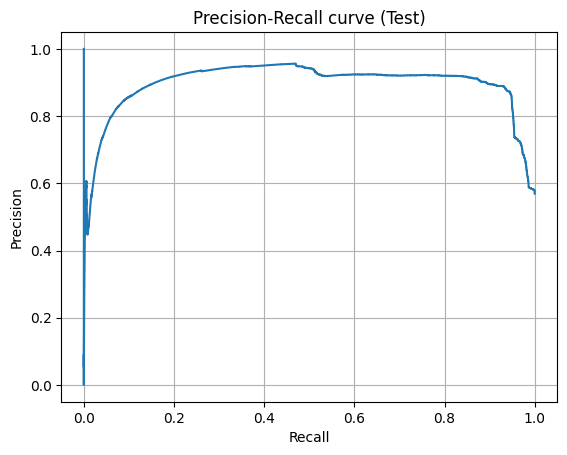

In [ ]:
# =========================
# CURVA PRECISION-RECALL TEST
# =========================
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresholds = precision_recall_curve(y_test, y_proba_test)

plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve (Test)")
plt.grid(True)
plt.show()

### BÚSQUEDA DE UN THRESHOLD ÓPTIMO PARA MEJORAR EL ÍNDICE DE FALSOS NEGATIVOS (ATAQUES NO DETECTADOS)

Primero evaluamos el modelo para el umbral (threshold) por defecto (0.5)


In [ ]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score,
    balanced_accuracy_score, average_precision_score
)

def evaluate_model(model, X_test, y_test, threshold=0.5, name="model"):
    """
    Evalúa un modelo binario con métricas centradas en la clase positiva (Attack=1).
    threshold solo aplica si el modelo devuelve probas/score.
    """
    # Score para PR-AUC y para aplicar threshold
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = None

    # Predicción final
    if y_score is None:
        # Modelos sin score: usamos predict()
        y_pred = model.predict(X_test)
    else:
        y_pred = (y_score >= threshold).astype(int)

    return {
        "Modelo": name,
        "Umbral": threshold if y_score is not None else None,
        "Accuracy": model.score(X_test, y_test),
        "Precision(Attack)": precision_score(y_test, y_pred, pos_label=1),
        "Recall(Attack)": recall_score(y_test, y_pred, pos_label=1),
        "F1(Attack)": f1_score(y_test, y_pred, pos_label=1),
        "F2(Attack)": fbeta_score(y_test, y_pred, beta=2, pos_label=1),
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_score) if y_score is not None else None
    }

## MODELOS COMPETIDORES

Comparamos con otros modelos...

### MACHINE LEARNING

In [ ]:
# -------------------------
# 1) Dummy baseline
# -------------------------
dummy_pipe = Pipeline(steps=[
    ("preprocesamiento", preprocess),
    ("clasificador", DummyClassifier(strategy="most_frequent", random_state=42))
])
dummy_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

In [ ]:
# -------------------------
# 2) Logistic Regression
# -------------------------
logreg_pipe = modeloBase
#logreg_pipe.fit(X_tr, y_tr)

In [ ]:
# -------------------------
# 3) Random Forest
# -------------------------
rf_pipe = Pipeline(steps=[
    ("preprocesamiento", preprocess),
    ("clasificador", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])
rf_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [ ]:
from sklearn.naive_bayes import GaussianNB
# -------------------------
# 4) Naive Bayes
# -------------------------

nb_pipe = Pipeline(steps=[
    ('preprocesamiento', preprocess),
    ('clasificador', GaussianNB())
])

nb_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'num_file_creations',
                                                   'num_shells',
                                                   'num_access_files',
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador', GaussianNB())])

In [ ]:
from xgboost import XGBClassifier
# -------------------------
# 5) XGBoost
# -------------------------

xgb_pipe = Pipeline(steps=[
    ('preprocesamiento', preprocess),
    ('clasificador', XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [ ]:
# -------------------------
# 6) SVM: LinearSVC
# -------------------------
from sklearn.svm import LinearSVC

svm_linear_pipe = Pipeline(steps=[
    ("preprocesamiento", preprocess),
    ("clasificador", LinearSVC(
        class_weight="balanced",
        random_state=42,
        max_iter=5000
    ))
])
svm_linear_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador',
                 LinearSVC(class_weight='balanced', max_iter=5000,
                           random_state=42))])

In [ ]:
# -------------------------
# 7) KNN
# -------------------------
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline(steps=[
    ("preprocesamiento", preprocess),
    ("clasificador", KNeighborsClassifier(
        n_neighbors=15,
        weights="distance",
        n_jobs=-1
    ))
])
knn_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'nu...
                                                   'is_host_login',
                                                   'is_guest_login', 'count',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate', ...])],
                                   verbose_feature_names_out=False)),
                ('clasificador',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=15,
                                      weights='distance'))])

## DEEP LEARNING

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score,
    balanced_accuracy_score, average_precision_score, roc_auc_score,
    confusion_matrix
)

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [ ]:
# Ajusta SOLO con entrenamiento
preprocess.fit(X_tr)

# Transforma a arrays numéricos
Xtr_t  = preprocess.transform(X_tr)
Xval_t = preprocess.transform(X_val)
Xtest_t = preprocess.transform(X_test)

# Asegúrate de que y son arrays 1D
ytr = np.asarray(y_tr).astype(int)
yval = np.asarray(y_val).astype(int)
ytest = np.asarray(y_test).astype(int)

print(Xtr_t.shape, Xval_t.shape, Xtest_t.shape)


(100771, 121) (25193, 121) (22541, 121)


In [ ]:
from tensorflow.keras import layers, models

def build_mlp(input_dim: int) -> tf.keras.Model:
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=[
            tf.keras.metrics.AUC(name="roc_auc"),
            tf.keras.metrics.AUC(curve="PR", name="pr_auc")
        ]
    )
    return model

mlp = build_mlp(Xtr_t.shape[1])
mlp.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,257 (251.00 KB)

 Trainable params: 64,257 (251.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Class weight opcional (recomendado en IDS)
# Si Attack=1 es minoritaria, esto ayuda a aumentar recall
from sklearn.utils.class_weight import compute_class_weight
classes = np.array([0, 1])
cw = compute_class_weight(class_weight="balanced", classes=classes, y=ytr)
class_weight = {0: cw[0], 1: cw[1]}
print("class_weight:", class_weight)

callbacks = [
    EarlyStopping(monitor="val_pr_auc", mode="max", patience=5, restore_best_weights=True)
]

history = mlp.fit(
    Xtr_t, ytr,
    validation_data=(Xval_t, yval),
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    class_weight=class_weight,   # si quieres probar sin esto, comenta la línea
    verbose=1
)


class_weight: {0: np.float64(0.9352470579500316), 1: np.float64(1.0743864213062668)}
Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.1071 - pr_auc: 0.9885 - roc_auc: 0.9888 - val_loss: 0.0113 - val_pr_auc: 0.9998 - val_roc_auc: 0.9998
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0188 - pr_auc: 0.9995 - roc_auc: 0.9996 - val_loss: 0.0090 - val_pr_auc: 0.9998 - val_roc_auc: 0.9998
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124 - pr_auc: 0.9997 - roc_auc: 0.9998 - val_loss: 0.0065 - val_pr_auc: 0.9998 - val_roc_auc: 0.9999
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - pr_auc: 0.9998 - roc_auc: 0.9999 - val_loss: 0.0065 - val_pr_auc: 0.9998 - val_roc_auc: 0.9999
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - pr_auc: 0.9998 - roc_auc: 0.9999 - val_loss: 0.0065 - val_pr_auc: 0.9999 - val_roc_auc: 0.9999
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0079 - pr_auc: 0.9998 - roc_auc

### BÚSQUEDA DE UN THRESHOLD ÓPTIMO PARA MEJORAR EL ÍNDICE DE FALSOS NEGATIVOS (ATAQUES NO DETECTADOS)

In [ ]:
# -------------------------------------------------------------
# Buscar umbral óptimo para LogReg maximizando F2 en VALIDACIÓN
# -------------------------------------------------------------
proba_val = logreg_pipe.predict_proba(X_val)[:, 1]
thresholds = np.linspace(0.01, 0.99, 99)

best_t = None
best_f2 = -1

for t in thresholds:
    pred_val = (proba_val >= t).astype(int)
    f2 = fbeta_score(y_val, pred_val, beta=2, pos_label=1)
    if f2 > best_f2:
        best_f2 = f2
        best_t = t

print(f"Mejor umbral para LogReg en VALID (max F2): t = {best_t:.2f} | F2_valid = {best_f2:.4f}")

Mejor umbral para LogReg en VALID (max F2): t = 0.32 | F2_valid = 0.9927


== MATRIZ DE CONFUSIÓN (TEST | umbral óptimo) ==
[[8897  814]
 [3118 9712]]


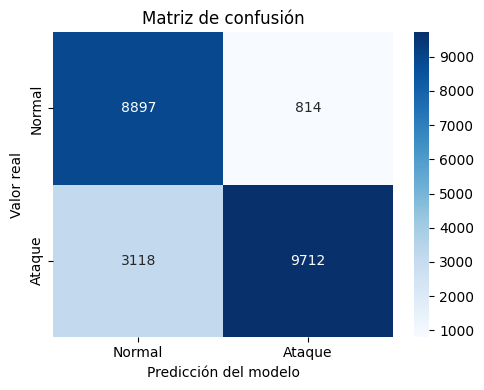

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Probabilidades en TEST
y_proba_test = modeloBase.predict_proba(X_test)[:, 1]

# 2) Aplicar el umbral óptimo aprendido en validación
y_pred_test_opt = (y_proba_test >= best_t).astype(int)

# 3) Matriz de confusión
cm_test_opt = confusion_matrix(y_test, y_pred_test_opt)

print("== MATRIZ DE CONFUSIÓN (TEST | umbral óptimo) ==")
print(cm_test_opt)

# 4) Dibujar matriz
labels = ["Normal", "Ataque"]

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_test_opt,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicción del modelo")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Predicción con umbral óptimo
y_pred_test_opt = (y_proba_test >= best_t).astype(int)

prec_opt = precision_score(y_test, y_pred_test_opt, pos_label=1)
rec_opt  = recall_score(y_test, y_pred_test_opt, pos_label=1)


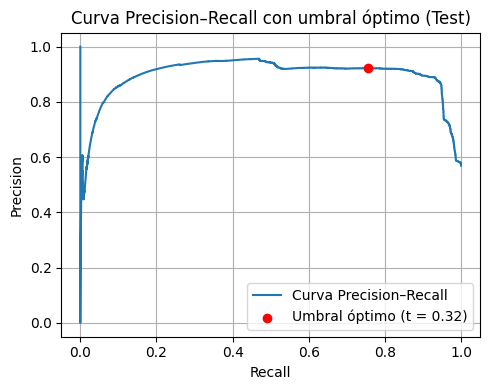

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_proba_test)

plt.figure(figsize=(5,4))
plt.plot(recall, precision, label="Curva Precision–Recall")
plt.scatter(
    rec_opt, prec_opt,
    color="red",
    zorder=5,
    label=f"Umbral óptimo (t = {best_t:.2f})"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall con umbral óptimo (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


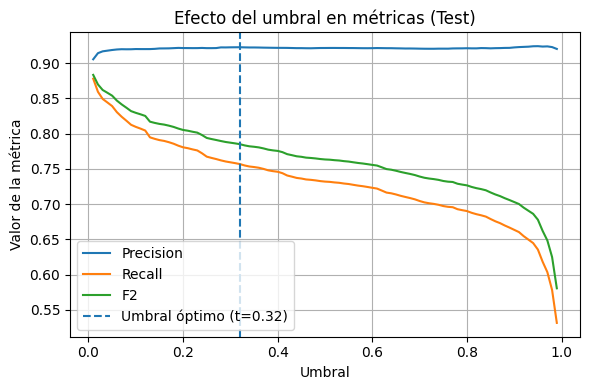

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, fbeta_score

# Probabilidades en el conjunto que quieras analizar (val o test)
y_score = modeloBase.predict_proba(X_test)[:, 1]   # o X_val
y_true  = y_test                                  # o y_val

thresholds = np.linspace(0.01, 0.99, 99)

precisions, recalls, f2s = [], [], []

for t in thresholds:
    y_pred = (y_score >= t).astype(int)
    precisions.append(precision_score(y_true, y_pred, pos_label=1))
    recalls.append(recall_score(y_true, y_pred, pos_label=1))
    f2s.append(fbeta_score(y_true, y_pred, beta=2, pos_label=1))

plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f2s, label="F2")

plt.axvline(best_t, linestyle="--", label=f"Umbral óptimo (t={best_t:.2f})")

plt.xlabel("Umbral")
plt.ylabel("Valor de la métrica")
plt.title("Efecto del umbral en métricas (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### RESULTADOS MÉTRICAS

In [ ]:
results = []

# LogReg umbral 0.50
results.append(evaluate_model(logreg_pipe, X_test, y_test, threshold=0.50, name="LogReg (t=0.50)"))

# LogReg umbral óptimo por F2
results.append(evaluate_model(logreg_pipe, X_test, y_test, threshold=best_t, name=f"LogReg (t={best_t:.2f}, opt F2)"))

df_results = pd.DataFrame(results)

# Ordenar para que se vea claro el "mejor" según F2
# df_results = df_results.sort_values(by="F2(Attack)", ascending=False).reset_index(drop=True)

display(df_results)


,Modelo,Umbral,Accuracy,Precision(Attack),Recall(Attack),F1(Attack),F2(Attack),Balanced Acc,PR-AUC
0,LogReg (t=0.50),0.50,0.812076,0.921605,0.732112,0.816002,0.763510,0.824917,0.890461
1,"LogReg (t=0.32, opt F2)",0.32,0.812076,0.922668,0.756976,0.831649,0.785176,0.836577,0.890461


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

def get_model_by_name(name):
    if name.startswith("Dummy"):
        return dummy_pipe, None
    if name.startswith("LogReg (t=0.50)"):
        return logreg_pipe, 0.50
    if name.startswith("LogReg (t=") and "opt F2" in name:
        return logreg_pipe, best_t
    if name.startswith("RandomForest"):
        return rf_pipe, 0.50
    raise ValueError(f"No reconozco el modelo: {name}")

def predict_with_threshold(model, X, threshold):
    if threshold is None:
        return model.predict(X)
    if hasattr(model, "predict_proba"):
        score = model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        score = model.decision_function(X)
    else:
        return model.predict(X)
    return (score >= threshold).astype(int)

# Selecciona top-2 modelos por F2 (ya están ordenados)
top2 = df_results["Modelo"].iloc[:2].tolist()

for mname in top2:
    model, t = get_model_by_name(mname)
    y_pred = predict_with_threshold(model, X_test, t)

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_df = pd.DataFrame(
        cm,
        index=["Real: Normal (0)", "Real: Attack (1)"],
        columns=["Pred: Normal (0)", "Pred: Attack (1)"]
    )

    print(f"\n===== MATRIZ DE CONFUSIÓN | {mname} =====")
    display(cm_df)


===== MATRIZ DE CONFUSIÓN | LogReg (t=0.50) =====


,Pred: Normal (0),Pred: Attack (1)
Real: Normal (0),8912,799
Real: Attack (1),3437,9393



===== MATRIZ DE CONFUSIÓN | LogReg (t=0.32, opt F2) =====


,Pred: Normal (0),Pred: Attack (1)
Real: Normal (0),8897,814
Real: Attack (1),3118,9712
